In [1]:
import cv2 
import numpy as np
import os
from matplotlib import pyplot as plt
import time 
import mediapipe as mp

Keypoints using MP holistics

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing =mp.solutions.drawing_utils
mp_face_mesh = mp.solutions.face_mesh

In [3]:
def mediapipe_detection(image,model):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image.flags.writeable=False
    result=model.process(image)
    image.flags.writeable=True
    image=cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
    return image,result
    

In [4]:
# def draw_landmarks(image,results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)

In [5]:
def draw_landmarks(image, results):
    # Use FACEMESH_TESSELATION for face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(image, results.face_landmarks, mp_face_mesh.FACEMESH_TESSELATION,
                                 mp_drawing.DrawingSpec(color=(80,110,10),thickness=1, circle_radius=1),
                                 mp_drawing.DrawingSpec(color=(80,256,121),thickness=1, circle_radius=1)
                                 )

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(80,22,76),thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(80,44,121),thickness=2, circle_radius=2)
                                 )

    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(121,22,76),thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(121,44,250),thickness=2, circle_radius=2)
                                 )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                                 mp_drawing.DrawingSpec(color=(245,1177,66),thickness=2, circle_radius=4),
                                 mp_drawing.DrawingSpec(color=(245,66,230),thickness=2, circle_radius=2)
                                 )

In [6]:
mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [7]:
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        #reads the frames
        ret,frame=cap.read()
        #extracts key features like landmarks from the "mediapipe_detection" function
        image,results=mediapipe_detection(frame, holistic)
        print(results)
        #draw landmarks in real time
        draw_landmarks(image,results)
        #displays the frames in a window named "OpenCV feed"
        cv2.imshow("OpenCV feed",image)
        #delay of 10 milliseconds and cam is released when "q" is pressed 
        if cv2.waitKey(10)& 0xFF ==ord('q'):
            break
    #relesases the cam hardware 
    cap.release()
    # closes all the window
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
len(results.face_landmarks.landmark)

468

In [9]:
results.right_hand_landmarks

In [10]:
frame

array([[[148, 127, 152],
        [149, 127, 152],
        [150, 123, 149],
        ...,
        [118, 110, 123],
        [116, 109, 123],
        [115, 108, 123]],

       [[147, 124, 150],
        [149, 124, 151],
        [151, 122, 149],
        ...,
        [114, 107, 121],
        [112, 106, 120],
        [111, 105, 120]],

       [[148, 121, 148],
        [151, 123, 150],
        [153, 121, 149],
        ...,
        [113, 106, 120],
        [110, 105, 119],
        [109, 105, 120]],

       ...,

       [[215, 195, 187],
        [215, 194, 186],
        [212, 192, 184],
        ...,
        [ 95, 114, 202],
        [ 95, 114, 202],
        [ 98, 117, 205]],

       [[209, 189, 179],
        [210, 190, 180],
        [209, 190, 180],
        ...,
        [ 98, 115, 206],
        [ 97, 115, 206],
        [ 98, 115, 208]],

       [[209, 188, 177],
        [210, 190, 179],
        [210, 191, 180],
        ...,
        [ 99, 115, 207],
        [ 99, 115, 209],
        [ 96, 113, 207]]

In [11]:
draw_landmarks( frame ,results)

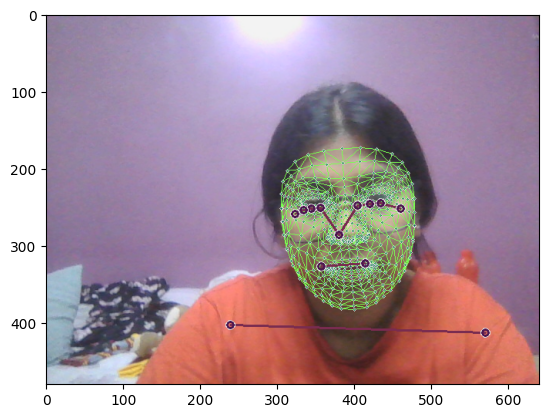

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [13]:
results.right_hand_landmarks

Extract Keypoint Features

In [14]:
len(results.pose_landmarks.landmark)

33

In [15]:
pose=[]
for res in results.pose_landmarks.landmark:
    test=np.array([res.x,res.y,res.z,res.visibility])
    pose.append(test)

In [16]:
len(pose)

33

In [17]:
if results.pose_landmarks: 
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
else: np.zeros(132)

In [18]:
if results.face_landmarks: 
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.face_landmarks.landmark]).flatten()
else: np.zeros(1404)

In [19]:
if results.left_hand_landmarks:
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()
else: np.zeros(21*3)

In [20]:
if results.right_hand_landmarks:
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten()
else: np.zeros(21*3)

In [21]:
np.zeros(21*3)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [22]:
pose.shape

(1872,)

In [65]:
def extract_keypoints(results):
    if results.pose_landmarks: 
        pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten()
    else: pose=np.zeros(33*4)
    if results.face_landmarks: 
        face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten()
    else: face=np.zeros(468*3)
    if results.left_hand_landmarks:
        lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten()
    else: lh=np.zeros(21*3)
    if results.right_hand_landmarks:
        rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten()
    else: rh=np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [66]:
extract_keypoints(results)[:-10]

array([ 0.62408978,  0.63196397, -1.0298723 , ...,  0.        ,
        0.        ,  0.        ])

Setup Folders for Collection

In [67]:
#path for exported data, numpy arrays
DATA_PATH=os.path.join('MP_Data')
#Actions that we try to detect 
actions=np.array(['hello','thanks','iloveyou'])
#30 video's worth of data
no_sequences=30
#30 are going to be 30 frames in length
sequence_length=30

In [68]:
#hello
##0
##2
#...
##29
#thanks
#......
#iloveyou

In [69]:
if not os.path.exists(DATA_PATH):
    os.makedirs(DATA_PATH)

for action in actions:
    for sequence in range(no_sequences):
        try:
            path = os.path.join(DATA_PATH, action, str(sequence))
            os.makedirs(path, exist_ok=True)
        except:
            pass
            


Collect Keypoint Values for Training and Testing

In [70]:
cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
    #loop through action 
    for action in actions:
        #loop throught sequence(each video has 30 sequence)
        for sequence in range (no_sequences):
            #loop throught each frame of each sequence
            for frame_num in range(sequence_length):
                
                #reads the frames
                ret,frame=cap.read()
                
                #extracts key features like landmarks from the "mediapipe_detection" function
                image,results=mediapipe_detection(frame, holistic)
                print(results)
                
                #draw landmarks in real time
                draw_landmarks(image,results)

                #Apply collection login 
                if frame_num==0:
                    cv2.putText(image, 'STARTING COLLECTION', (120,200),
                                cv2.FONT_HERSHEY_SIMPLEX,1,(0,255,0),4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frame for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1, cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frame for {} Video Number {}'.format(action, sequence), (15,12),
                                cv2.FONT_HERSHEY_SIMPLEX,0.5,(0,0,255),1, cv2.LINE_AA)
                #NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path=os.path.join(DATA_PATH,action,str(sequence),str(frame_num))
                np.save(npy_path,keypoints)
                
                #displays the frames in a window named "OpenCV feed"
                cv2.imshow("OpenCV feed",image)
                #delay of 10 milliseconds and cam is released when "q" is pressed 
                if cv2.waitKey(10)& 0xFF ==ord('q'):
                    break
    #relesases the cam hardware 
    cap.release()
    # closes all the window
    cv2.destroyAllWindows

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [71]:
cap.release()
cv2.destroyAllWindows()

Preprocess Data and Create Labels and Features

In [72]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [73]:
label_map={label:num for num, label in enumerate(actions)}

In [74]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [75]:
sequences,labels=[],[]
for action in actions:
    for sequence in range(no_sequences):
        window=[]
        for frame_num in range(sequence_length):
            res=np.load(os.path.join(DATA_PATH,action, str(sequence),"{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [76]:
np.array(sequences).shape

(90, 30, 1662)

In [77]:
np.array(labels).shape

(90,)

In [78]:
X=np.array(sequences)

In [79]:
X.shape

(90, 30, 1662)

In [80]:
X

array([[[ 0.55668741,  0.63944244, -1.84199595, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55780023,  0.63939124, -1.59161758, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55786854,  0.6388647 , -1.61005378, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.56004936,  0.60125083, -0.52303648, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.560489  ,  0.60168207, -0.54215264, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.56193179,  0.6013695 , -0.5088498 , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.56205982,  0.60046196, -0.56543648, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.5565176 ,  0.59597927, -0.99100125, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.55570042,  0.59115523, -1.00401509, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.55496031,  0.58548176, -0.98941004, ...,  

In [81]:
Y=to_categorical(labels).astype(int)

In [82]:
Y #one-hot encoded

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [83]:
x_train,x_test, y_train, y_test=train_test_split(X,Y,test_size=0.05)

In [84]:
x_train.shape

(85, 30, 1662)

In [85]:
y_train.shape

(85, 3)

In [86]:
x_test.shape

(5, 30, 1662)

In [87]:
y_test.shape

(5, 3)

Build and Train LSTM Neural Network

In [88]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense
from tensorflow.keras.callbacks import TensorBoard

In [89]:
log_dir=os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [90]:
model=Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu',input_shape=(30,1662)))
model.add(LSTM(128,return_sequences=True, activation='relu'))
model.add(LSTM(64,return_sequences=False,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(actions.shape[0],activation='softmax'))

C:\Users\KIIT\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [92]:
model.fit(x_train,y_train,epochs=2000,callbacks=[tb_callback])

Epoch 1/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - categorical_accuracy: 0.3758 - loss: 1.3544
Epoch 2/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - categorical_accuracy: 0.2545 - loss: 1.3574
Epoch 3/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 288ms/step - categorical_accuracy: 0.3542 - loss: 10.5323
Epoch 4/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 399ms/step - categorical_accuracy: 0.3131 - loss: 3.0499
Epoch 5/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 794ms/step - categorical_accuracy: 0.4187 - loss: 2.6815
Epoch 6/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - categorical_accuracy: 0.3562 - loss: 1.7973
Epoch 7/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 536ms/step - categorical_accuracy: 0.3444 - loss: 1.4513
Epoch 8/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 343ms/step - categorical_accuracy: 0.3228 - loss: 1.4451
Epoch 9/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - categorical_accuracy: 0.3483 - loss: 1.5777
Epoch 10/2000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 379ms/step - categorical_accuracy: 0.4168 - loss: 1.5807
Epoch 11/2000
3/3 

KeyboardInterrupt: 

In [93]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 30, 64)              │         442,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 30, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

Evaluation using Confusion Maxtrix and Accuracy

In [94]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [95]:
y_predict=model.predict(x_train)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step


In [96]:
y_true=np.argmax(y_train,axis=1).tolist()
y_predict=np.argmax(y_predict, axis=1).tolist()

In [97]:
multilabel_confusion_matrix(y_true,y_predict)

array([[[54,  2],
        [ 0, 29]],

       [[57,  0],
        [ 0, 28]],

       [[57,  0],
        [ 2, 26]]], dtype=int64)

In [105]:
accuracy_score(y_true,y_predict)

0.9764705882352941

Test in Real Time

In [106]:
np.expand_dims(x_test[0], axis=0).shape

(1, 30, 1662)

In [114]:
#1.new detection varieables
sequence=[]
sentence=[]
threshold=0.5

cap=cv2.VideoCapture(0)
#set mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.7) as holistic:
    while cap.isOpened():
        
        #reads the frames
        ret,frame=cap.read()
        
        #extracts key features like landmarks from the "mediapipe_detection" function
        image,results=mediapipe_detection(frame, holistic)
        print(results)
        
        #draw landmarks in real time
        draw_landmarks(image,results)

        #2.Prediction logic 
        keypoints=extract_keypoints(results)
        #sequence.insert(0,keypoints)
        sequence.append(keypoints)
        sequence=sequence[:30]

        print(f"res.shape: {res.shape}, res: {res}")
        print(f"np.argmax(res): {np.argmax(res)}")
        print(f"actions length: {len(actions)}")

        if len(sequence)==30:
            res=model.predict(np.expand_dims(sequence,axis=0))[0]
            print(res)
            print(actions[np.argmax(res)])

        #3.Viz logic
        if res[np.argmax(res)]>threshold:
            if len(sentence)>0:
                if actions[np.argmax(res)]!=sentence[-1]:
                    sentence.append(actions[np.argmax(res)])
            else:
                sentence.append(actions[np.argmax(res)])
        if len(sentence)>5:
            sentence=sentence[-5:]
            
        cv2.rectangle(image,(0,0),(640,40),(245,117,16),-1)
        print("Current sentence:", sentence)

        cv2.putText(image,' '.join(sentence),(3,30),
                    cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2,cv2.LINE_AA)
        
        #displays the frames in a window named "OpenCV feed"
        cv2.imshow("OpenCV feed",image)
        
        #delay of 10 milliseconds and cam is released when "q" is pressed 
        if cv2.waitKey(10)& 0xFF ==ord('q'):
            break
    #relesases the cam hardware 
    cap.release()
    # closes all the window
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
res.shape: (3,), res: [0.0096479  0.03554467 0.95480746]
np.argmax(res): 2
actions length: 3
Current sentence: ['iloveyou']
<class 'mediapipe.python.solution_base.SolutionOutputs'>
res.shape: (3,), res: [0.0096479  0.03554467 0.95480746]
np.argmax(res): 2
actions length: 3
Current sentence: ['iloveyou']
<class 'mediapipe.python.solution_base.SolutionOutputs'>
res.shape: (3,), res: [0.0096479  0.03554467 0.95480746]
np.argmax(res): 2
actions length: 3
Current sentence: ['iloveyou']
<class 'mediapipe.python.solution_base.SolutionOutputs'>
res.shape: (3,), res: [0.0096479  0.03554467 0.95480746]
np.argmax(res): 2
actions length: 3
Current sentence: ['iloveyou']
<class 'mediapipe.python.solution_base.SolutionOutputs'>
res.shape: (3,), res: [0.0096479  0.03554467 0.95480746]
np.argmax(res): 2
actions length: 3
Current sentence: ['iloveyou']
<class 'mediapipe.python.solution_base.SolutionOutputs'>
res.shape: (3,), res: [0.0096479  0.03

In [ ]:
model.predict(np.expand_dims(x_test[0],axis=0))

In [111]:
    #relesases the cam hardware 
    cap.release()
    # closes all the window
    cv2.destroyAllWindows()